In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [0]:
class kmeans():
  """
  kmeans implematation
  """
  def __init__(self, n_clusters=3,max_iter=20):
    """
    ininitial the class, gets number of clusters and max iteration params
    """
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    
  def fit(self, X):
    """
    normalize the parameters, given numeric values to non-numeric attributes.
     Read data from the file and split the data for cross validation.
    Find Initial Centroids: Choose k centroids in random.
    Distance Calculation: Finding the distance between each of the datapoints 
    with each of the centroids. This distance metric is used to find the which
     cluster the points belong to.
    Re-calculating the centroids: Find the new values for centroid.
    Stop the iteration: Stop the algorithm when the difference between the old 
    and the new centroids is negligible.
    """
    self.original_X = X
    self.min_X = self.original_X.min(axis=0)
    self.max_X = self.original_X.max(axis=0)
    scaler = MinMaxScaler()
    self.X = scaler.fit_transform(X)
    self.norm_centroms = np.random.rand(self.n_clusters, 1, X.shape[-1])
    
    counter_steps = 0
    for _ in range(self.max_iter):
      counter_steps += 1
      for x in self.X:
        #calc the abs distance for each centrom to each point
        ditances = np.abs(self.norm_centroms - self.X).sum(axis=-1)
        #find the min distance of each point to some centrom
        idx_cents = np.argmin(ditances, axis=0)
        # for centrom recalc it by the mean of all its point
        for centrom_idx in range(self.n_clusters):
          self.norm_centroms[centrom_idx] = self.X[idx_cents==centrom_idx].mean(axis=0)
          if np.any(np.isnan(self.norm_centroms)):
            print('re-random')
            self.norm_centroms = np.array([np.random.rand(1)[0] if np.isnan(num) else num 
                      for centrom in self.norm_centroms for row in centrom 
                      for num in row ]).reshape(self.norm_centroms.shape)
            break
          
      if counter_steps % 10 == 0:
        print('\r\b',np.round(counter_steps/self.max_iter*100,2),'%', end='')
          
    self.__inverse_centroms()
    self.__calc_inertia()
         
  def inertia(self):
    """
    returns the inertia
    """
    return self.inertia
  
  def __inverse_centroms(self):
    """
    inverse the real values of the centroms from the normalized values 
    """
    self.centroms = self.norm_centroms * (self.max_X - self.min_X) + self.min_X 
  
  def __calc_inertia(self):
    """
    calculation the inertia
    """
    ditances = ((self.centroms - self.original_X) ** 2).sum(axis=-1)
    self.inertia = ditances.min(axis=0).sum()
    


## Generate the dataset and runs the model kmeans

In [0]:
from sklearn.datasets.samples_generator import make_blobs

blob_centers = np.array([[0.5, 5], [3,-5], [-4,2], [-2, -2],[0.5,2],[0.5,3]])
blob_std = np.array([.15, 0.2, .5, .7,.4, .3])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std)

In [0]:
def plot_clusters(X, y=None):
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel('$x_1$', fontsize=14)
  plt.ylabel('$x_2$',fontsize=14, rotation=0)

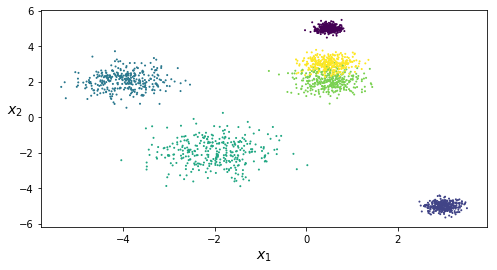

In [0]:
plt.figure(figsize=(8,4))
plot_clusters(X, y)

In [0]:
kmeans1 = kmeans(6,max_iter=50)
kmeans1.fit(X)

 100.0 %

In [0]:
kmeans1.inertia

669.286299250193

In [0]:
centroms = kmeans1.centroms.reshape((kmeans1.centroms.shape[0],kmeans1.centroms.shape[-1]))

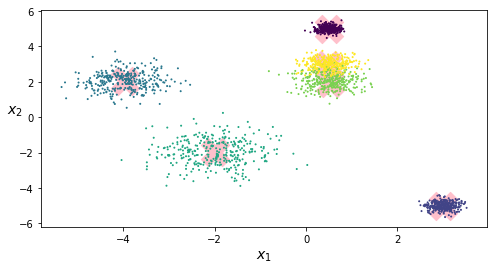

In [0]:
plt.figure(figsize=(8,4))
plt.scatter(centroms[:,0],centroms[:,-1],marker='X',s=800,c='pink')
plot_clusters(X, y)